<a href="https://colab.research.google.com/github/Martin-hub06/Predicting-Student-pass-or-fail-nsp-nexus-project-2/blob/main/Student_pass_or_fail_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🎓 Logistic Regression: Predicting Student Pass/Fail Based on Study Hours and Attendance

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Step 1: Prepare the dataset
data = {
    'Hours_Studied': [5, 2, 4, 1, 6, 3, 7, 0, 2, 8],
    'Attendance': [85, 60, 75, 50, 90, 70, 95, 40, 55, 98],
    'Pass_Fail': [1, 0, 1, 0, 1, 1, 1, 0, 0, 1]
}
df = pd.DataFrame(data)

print("🎓 Student Dataset:\n")
print(df)

🎓 Student Dataset:

   Hours_Studied  Attendance  Pass_Fail
0              5          85          1
1              2          60          0
2              4          75          1
3              1          50          0
4              6          90          1
5              3          70          1
6              7          95          1
7              0          40          0
8              2          55          0
9              8          98          1


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


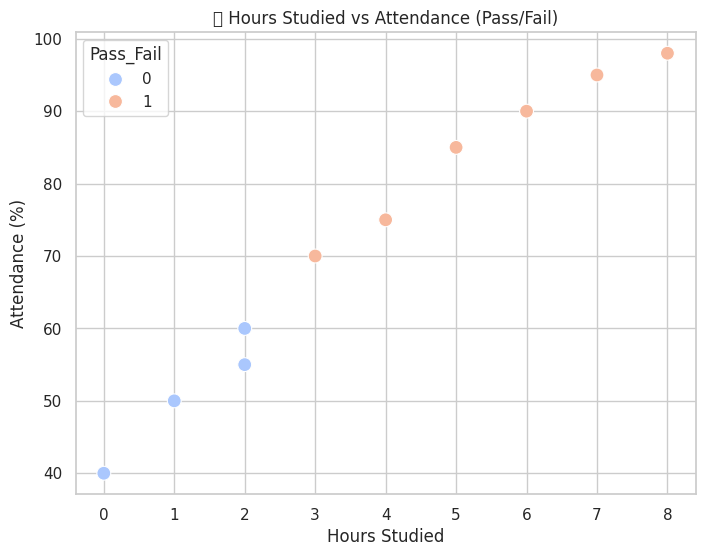

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


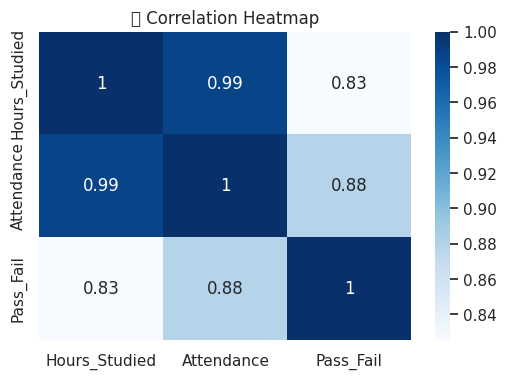

In [ ]:
# Step 2: Visualize the data
sns.set(style="whitegrid")

# Scatter plot of Hours Studied vs Attendance
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Hours_Studied', y='Attendance', hue='Pass_Fail', palette='coolwarm', s=100)
plt.title("📊 Hours Studied vs Attendance (Pass/Fail)")
plt.xlabel("Hours Studied")
plt.ylabel("Attendance (%)")
plt.show()

# Heatmap for correlation
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title("🔍 Correlation Heatmap")
plt.show()

In [ ]:
# Step 3: Prepare features and target
X = df[['Hours_Studied', 'Attendance']]
y = df['Pass_Fail']

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Step 5: Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
print("\n✅ Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))


✅ Model Accuracy: 1.0

🧮 Confusion Matrix:
 [[2 0]
 [0 1]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [ ]:
# Step 8: Predict for custom input
try:
    hours = float(input("Enter Hours Studied: "))
    attendance = float(input("Enter Attendance (%): "))
    user_input = pd.DataFrame([[hours, attendance]], columns=['Hours_Studied', 'Attendance'])
    prediction = model.predict(user_input)

    print("\n🔍 Prediction Result:")
    print("🎉 PASS" if prediction[0] == 1 else "❌ FAIL")

except ValueError:
    print("⚠️ Please enter valid numeric inputs.")

Enter Hours Studied: 6
Enter Attendance (%): 76

🔍 Prediction Result:
🎉 PASS
